In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
from fastai.vision import *
from fastai.metrics import error_rate
import torch
defaults.device = torch.device('cpu')


In [27]:
bs = 64


In [28]:
path = Path('data')

In [29]:
path.ls()

[PosixPath('data/predator'), PosixPath('data/alien')]

In [34]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=265, num_workers=0).normalize(imagenet_stats)

In [35]:
data.classes

['alien', 'predator']

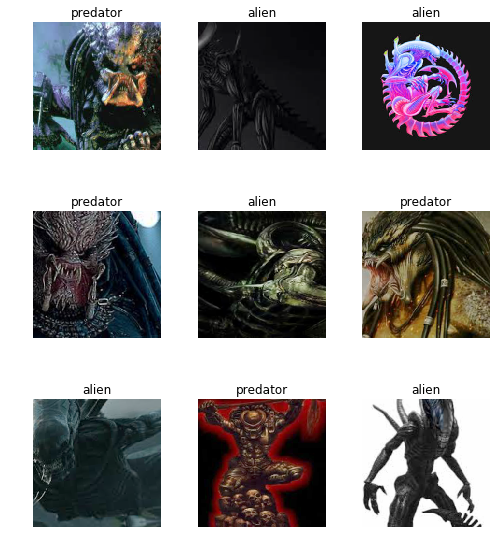

In [36]:
data.show_batch(rows=3, figsize=(7,8))

In [37]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['alien', 'predator'], 2, 556, 138)

In [39]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [40]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.599368,0.222373,0.108696,08:56
1,0.366586,0.148920,0.043478,08:22
2,0.281319,0.167312,0.057971,08:19
3,0.226494,0.130922,0.057971,08:16
4,0.190876,0.148832,0.057971,08:20
5,0.159667,0.145160,0.057971,08:09
6,0.136447,0.140341,0.057971,08:05
7,0.124023,0.137024,0.050725,08:07


In [41]:
learn.save('stage-1')

In [43]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (556 items)
x: ImageList
Image (3, 265, 265),Image (3, 265, 265),Image (3, 265, 265),Image (3, 265, 265),Image (3, 265, 265)
y: CategoryList
predator,predator,predator,predator,predator
Path: data;

Valid: LabelList (138 items)
x: ImageList
Image (3, 265, 265),Image (3, 265, 265),Image (3, 265, 265),Image (3, 265, 265),Image (3, 265, 265)
y: CategoryList
alien,alien,predator,predator,predator
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


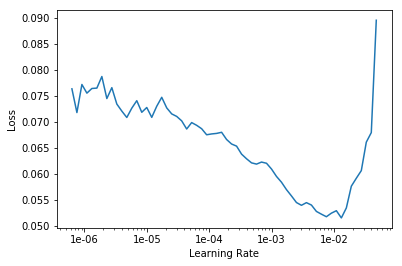

In [45]:
learn.recorder.plot()

In [46]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(0.00001, 0.0005))

epoch,train_loss,valid_loss,error_rate,time
0,0.089337,0.135564,0.043478,10:52
1,0.088719,0.132220,0.057971,10:59
2,0.065228,0.158462,0.065217,10:58
3,0.057329,0.111128,0.036232,12:00
4,0.048519,0.092381,0.028986,12:26
5,0.043084,0.103645,0.036232,12:01
6,0.037208,0.098253,0.036232,11:28
7,0.034400,0.093517,0.036232,10:57


In [48]:
learn.save('stage-2-one-percent')

In [49]:
learn.export()


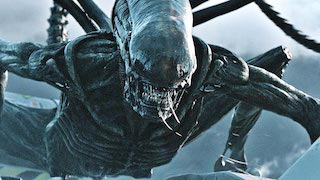

In [52]:
img = open_image(path/'alien.jpg')
img


In [53]:
defaults.device = torch.device('cpu')
learn = load_learner(path)


In [54]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category alien

In [55]:
img2 = open_image(path/'predator.jpg')

In [56]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class

Category predator

In [57]:
from collections import Counter

alien_validation = Path("/Users/williambright/Downloads/data/validation/alien/")
predator_validation = Path("/Users/williambright/Downloads/data/validation/predator/")


def verify_img(n):
    image = open_image(n)
    pred_class,pred_idx,outputs = learn.predict(image)
    return pred_class

predator_accuracy = Counter(map(verify_img, predator_validation.ls()))
alien_accuracy = Counter(map(verify_img, alien_validation.ls()))

print(f"The results for predator accuracy : {predator_accuracy}")
print(f"The results for alien accuracy : {alien_accuracy}")



The results for predator accuracy : Counter({Category predator: 93, Category alien: 7})
The results for alien accuracy : Counter({Category alien: 96, Category predator: 4})
